## Make necessary imports

In [1]:
import sys
sys.path.append('../../')
import time

In [2]:
from library.datasets.cifar.cifar100 import CIFAR100
from library.utils import file_utils

In [3]:
total_time = 0
exp_no = 1

In [4]:
output_directory = '../../models/cifar100/load_cifar100_dataset/'
dataset_file = output_directory + 'cifar100_dataset.h5'
file_utils.mkdir_p(output_directory)
num_train_images = 1.0

## Load CIFAR 100 Dataset

In [5]:
start = time.time()
cifar100 = CIFAR100(num_images=num_train_images, save_h5py='')
end = time.time()
total_time += (end-start)
print('CIFAR10 class constructor - %.4f seconds' % (end-start))

CIFAR10 class constructor - 0.0002 seconds


In [6]:
start = time.time()
cifar100.load_data(data_directory='../../datasets/cifar100/')
end = time.time()
total_time += (end-start)
print('Loaded CIFAR100 dataset in %.4f seconds' % (end-start))

Loading CIFAR 100 Dataset
MD5sum of the file: ../../datasets/cifar100/cifar-100.tar.gz is verified
Extracting file ../../datasets/cifar100/cifar-100.tar.gz to ../../datasets/cifar100/cifar-100-batches
Loading 50000 train images
Loading CIFAR 100 Train Dataset
Reading unpicked data file: ../../datasets/cifar100/cifar-100-batches/train
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
99
19
Success
['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips']
[19 29  0 11  1 86 90 28 23 31 39 96 82 17 71]
['plates' 'television' 'beaver' 'poppies' 'dolphin' 'oak' 'bicycle'
 'telephone' 'pears' 'chair' 'cockroach' 'rocket' 'rabbit' 'cans' 'boy']

Loading 10000 test images
Loading CIFAR 100 Test Dataset
Unpickling test file: ../../datasets/cifar100/cifar-100-batches/test
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
Reading 

## Plot CIFAR 100 Train dataset

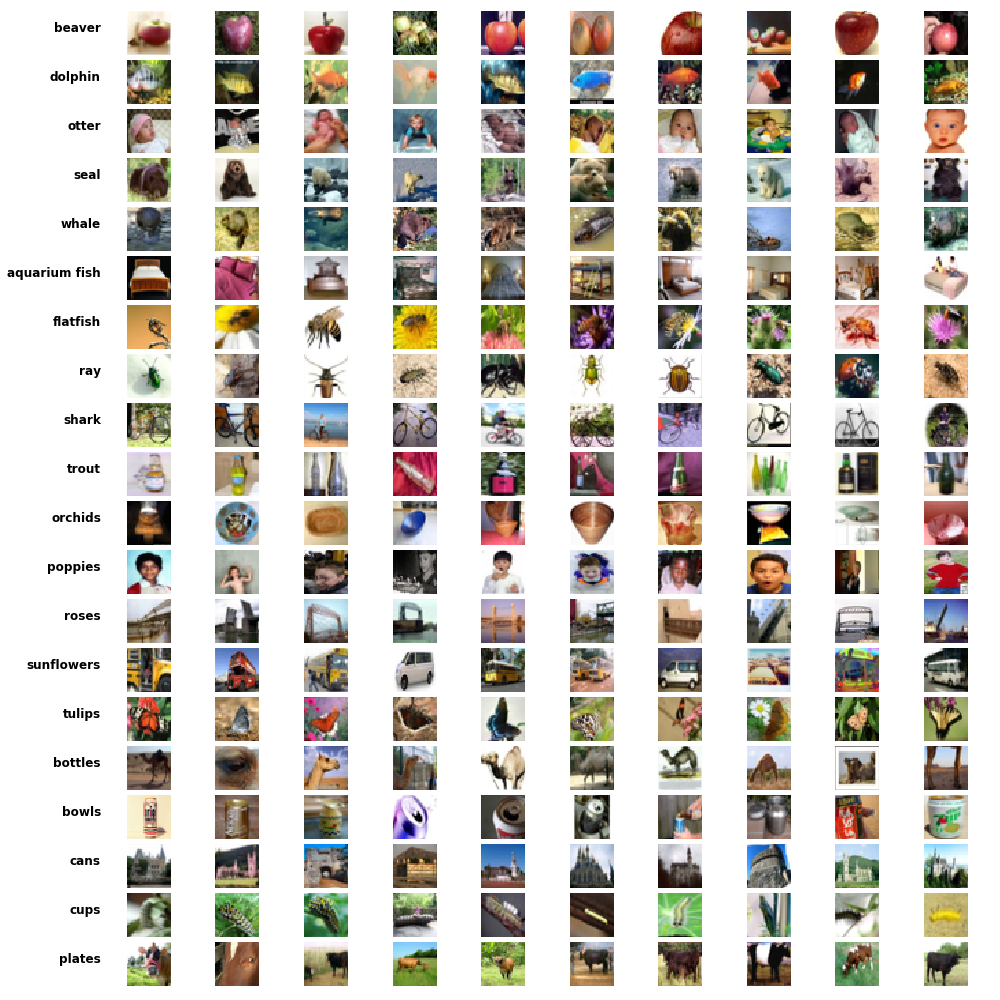

In [7]:
cifar100.plot_sample(plot_train=True, plot_test=False, fig_size=(14, 14))

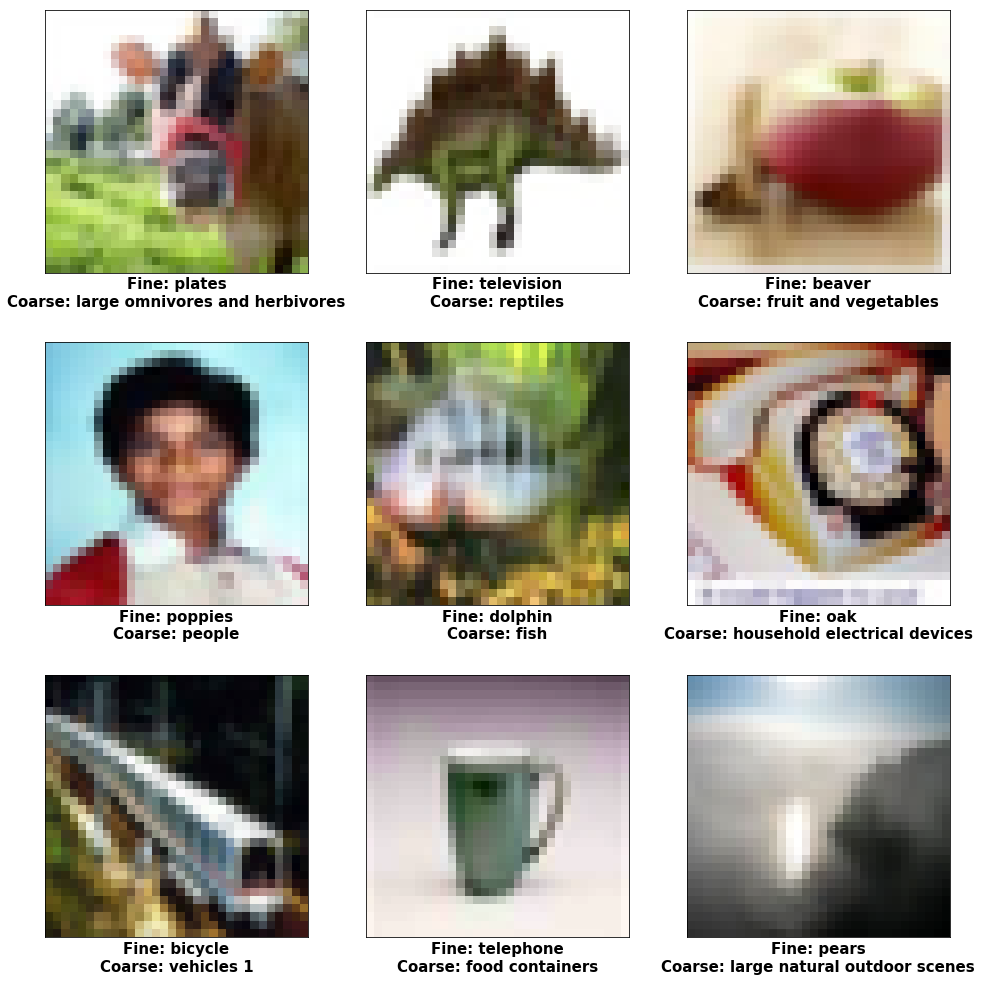

True

In [8]:
cifar100.plot_images(cifar100.train.images, cifar100.train.fine_class_names, 
                     cls_true_coarse=cifar100.train.coarse_class_names,
                     nrows=3, ncols=3, fig_size=(14,14), fontsize=15, convert=False, type='rgb')

## Plot CIFAR 100 Test dataset

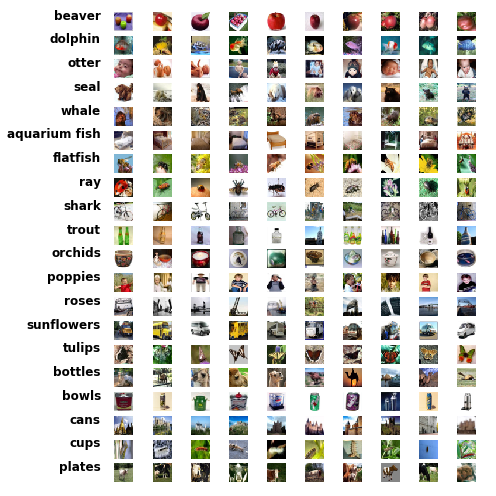

In [9]:
cifar100.plot_sample(plot_train=False, plot_test=True)

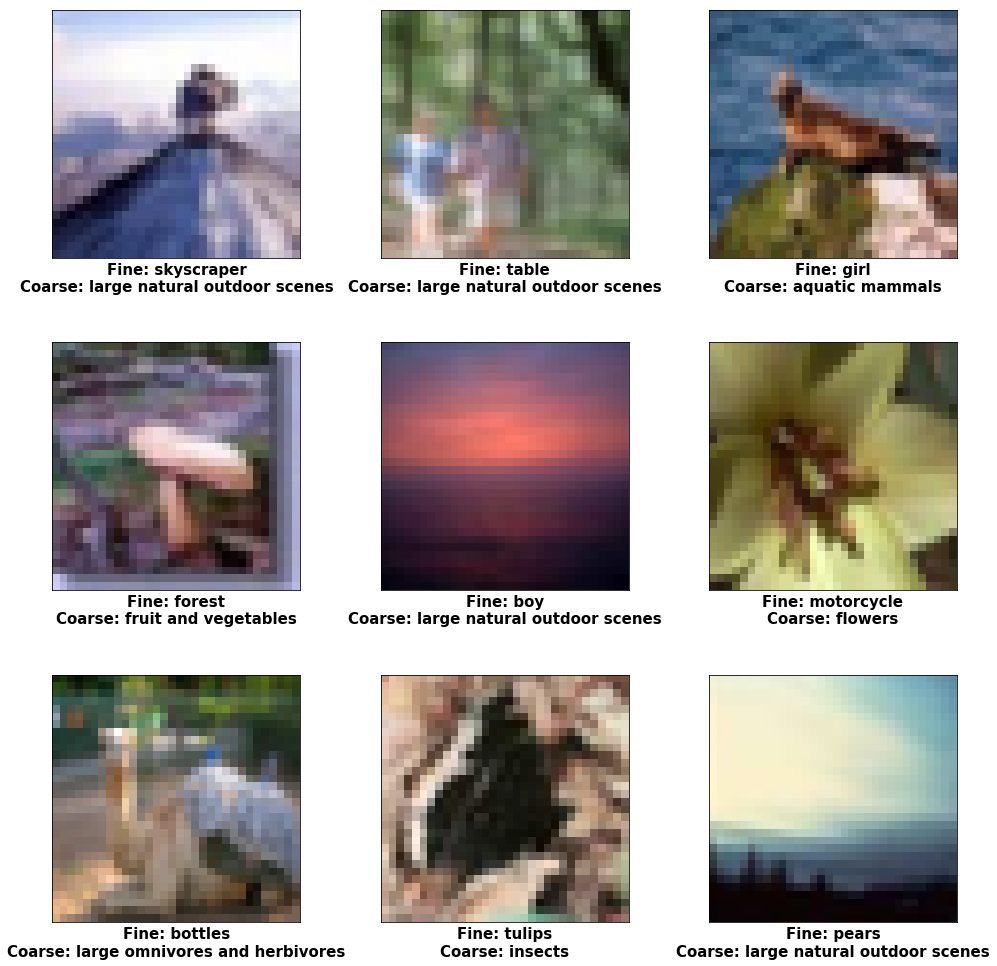

True

In [10]:
cifar100.plot_images(cifar100.test.images, cifar100.test.fine_class_names, 
                     cls_true_coarse=cifar100.test.coarse_class_names,
                     nrows=3, ncols=3, fig_size=(14,14), fontsize=15, convert=False, type='rgb')

## Write the notebook to HTML file

In [ ]:
def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    output_notebook = nbformat.read(read_file, as_version=4)
    print()
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [ ]:
%%javascript
var notebook = IPython.notebook
notebook.save_notebook()

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
current_file = './' + theNotebook + '.ipynb'
output_file = output_directory + 'exp_no_' + str(exp_no).zfill(2) + '_' + theNotebook + '.html'
print('Current file: ' + str(current_file))
print('Output file: ' + str(output_file))
file_utils.mkdir_p(output_directory) 
output_HTML(current_file, output_file)

NameError: name 'theNotebook' is not defined

In [ ]:
print('Code took %.6f s to run on training with %d examples' % (total_time,num_train_images))